## **"dl4td-water(ANN-RF)"**

### Libraries Used:
- `numpy`: For linear algebra operations.
- `pandas`: For data processing and CSV file I/O.
- `tensorflow`: For building and training neural network models.
- `matplotlib.pyplot`: For visualizations.
- `seaborn`: For statistical data visualization.
- `sklearn.metrics.classification_report`: For evaluating classification models.
- `sklearn.model_selection.train_test_split`: For splitting datasets into training and testing sets.
- `sklearn.preprocessing.StandardScaler`: For feature normalization.
- `sklearn.model_selection.GridSearchCV`: For grid search hyperparameter tuning.
- `sklearn.ensemble.RandomForestClassifier`: For implementing a Random Forest model.
- `sklearn.model_selection.cross_val_score`: For cross-validation.

### Added Implementations:
1. **Regularization**: Dropout and L2 regularization were added to the dense layers of the neural network to prevent overfitting.
2. **Hyperparameter Optimization**: GridSearchCV was used to tune the hyperparameters of the neural network model and find the best combination.
3. **Ensemble Learning**: A Random Forest model was implemented as a comparison and possible combination with the neural network.
4. **Cross-Validation**: Cross-validation was used to evaluate the model's performance more robustly.
5. **Error Analysis**: The model's errors on the test set were examined through a detailed classification report.


### Models:

1. **Artificial Neural Network (ANN):**
- TensorFlow was used to build an artificial neural network (ANN) with dense layers.
- The neural network has an input layer, two hidden layers, and an output layer with sigmoid activation for binary classification of water potability.
- Regularization techniques such as dropout and L2 regularization were implemented to prevent overfitting of the model.

2. **Random Forest:**
- The Random Forest model from the scikit-learn library was used as another machine learning approach.
- This model was used for comparison and potentially for ensemble with the neural network to enhance the accuracy of water potability prediction.

----------

## Libraries

In [1]:
import numpy as np  # Library for linear algebra operations
import pandas as pd  # Library for data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf  # TensorFlow, a machine learning framework
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Statistical data visualization library based on Matplotlib
from sklearn.metrics import classification_report  # Evaluation metric for classification models
from sklearn.model_selection import GridSearchCV, cross_val_score  # Hyperparameter tuning and cross-validation
from sklearn.ensemble import RandomForestClassifier  # Machine Learning Models
from tensorflow.keras.models import Sequential  # Keras Sequential Model
from tensorflow.keras.layers import Input, Dense, Dropout  # Keras layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier  # Keras Wrapper for Scikit-Learn
from sklearn.preprocessing import StandardScaler  # Data preprocessing

In [2]:
df = pd.read_csv('../data/drinking_water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# List of columns to extract from the DataFrame
columns_to_extract = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                      'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Extract the 'Potability' column as train labels
train_labels = df['Potability']


In [4]:
# Extract the specified columns from the DataFrame as train features
train_features = df[columns_to_extract]

# Display the first few rows of the train features DataFrame
train_features.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X_train: Features for training, X_test: Features for testing
# y_train: Labels for training, y_test: Labels for testing
# test_size=0.3: 30% of the data will be used for testing, random_state=2: Random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.3, random_state=2)

In [6]:
from sklearn.ensemble import RandomForestClassifier

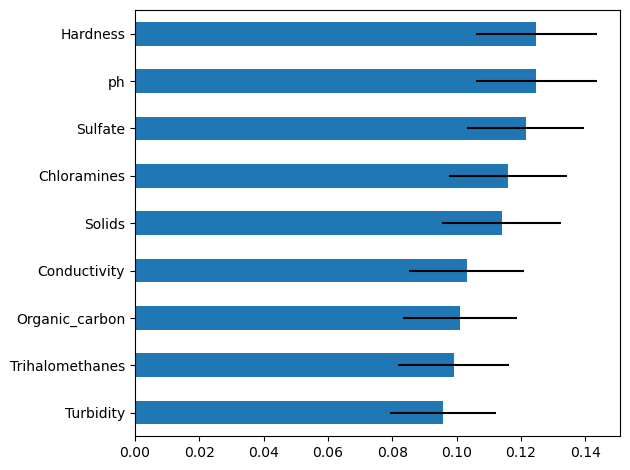

(2293, 9) (983, 9) (2293,) (983,)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with 1000 estimators and a random state of 2
rf = RandomForestClassifier(n_estimators=1000, random_state=2)

# Train the Random Forest classifier on the training data
rf.fit(X_train, y_train)

# Extract feature importances and standard deviations
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Create a DataFrame to store feature importances and standard deviations
df_balanced = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})

# Sort the DataFrame by importance
df_balanced = df_balanced.sort_values('importance')

# Select features with importance greater than or equal to 0.05
select_features = df_balanced[df_balanced.importance >= 0.05].feature

# Plot feature importances
ax = df_balanced.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.tight_layout()
plt.show()

# Print the shapes of the training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Initialize StandardScaler for feature normalization
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)


In [10]:
# Define the neural network model
model = tf.keras.Sequential([
    # Input layer with shape equal to the number of features
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    
    # First hidden layer with 64 units and ReLU activation function
    tf.keras.layers.Dense(64, activation='relu'),
    
    # Second hidden layer with 128 units and ReLU activation function
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Output layer with 1 unit and sigmoid activation function for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [11]:
model.compile(
    optimizer='adagrad',  # Optimizer: Adagrad
    loss=tf.keras.losses.binary_crossentropy,  # Loss function: Binary crossentropy
    metrics=['accuracy']  # Evaluation metric: Accuracy
)


In [14]:
# Train the model on the scaled training data
# Validate on the scaled testing data
# Epochs: 10, Batch size: 32
y_pred = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30, batch_size=32)

Epoch 1/30
72/72 [==============================] - 1s 10ms/step - loss: 0.6676 - accuracy: 0.6145 - val_loss: 0.6725 - val_accuracy: 0.6134
Epoch 2/30
72/72 [==============================] - 0s 3ms/step - loss: 0.6667 - accuracy: 0.6154 - val_loss: 0.6717 - val_accuracy: 0.6144
Epoch 3/30
72/72 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6180 - val_loss: 0.6709 - val_accuracy: 0.6165
Epoch 4/30
72/72 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6188 - val_loss: 0.6702 - val_accuracy: 0.6175
Epoch 5/30
72/72 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.6197 - val_loss: 0.6695 - val_accuracy: 0.6185
Epoch 6/30
72/72 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6197 - val_loss: 0.6689 - val_accuracy: 0.6175
Epoch 7/30
72/72 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6206 - val_loss: 0.6682 - val_accuracy: 0.6175
Epoch 8/30
72/72 [=

In [15]:
# Predict probabilities for the testing data
y_pred_probabilities = model.predict(X_test_scaled)

# Convert probabilities to class predictions (0 or 1)
y_pred_classes = (y_pred_probabilities > 0.5).astype(int)

# Generate classification report
classification_rep = classification_report(y_test, y_pred_classes)

# Print the classification report
print(classification_rep)


31/31 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.62      0.98      0.76       599
           1       0.68      0.07      0.12       384

    accuracy                           0.62       983
   macro avg       0.65      0.52      0.44       983
weighted avg       0.64      0.62      0.51       983



In [19]:
# Extract training and validation accuracy
train_acc = y_pred.history['accuracy']
val_acc = y_pred.history['val_accuracy']

# Extract training and validation loss
train_loss = y_pred.history['loss']
val_loss = y_pred.history['val_loss']


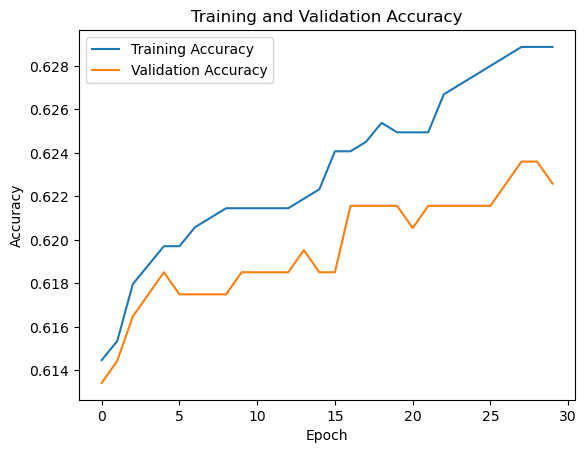

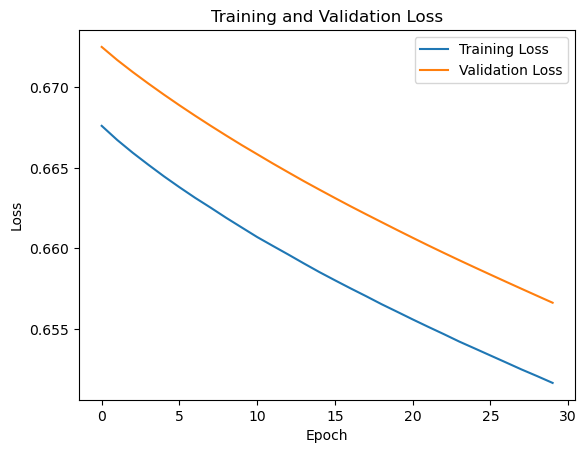

In [20]:
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# Regularization
def create_regularized_model(learning_rate=0.01, dropout_rate=0.2, l2_reg=0.01):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [22]:
# Hyperparameter optimization
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.1, 0.2, 0.3],
    'l2_reg': [0.001, 0.01, 0.1]
}

In [25]:
model = KerasClassifier(build_fn=create_regularized_model, epochs=10, batch_size=32, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)


C:\Users\nesto\AppData\Local\Temp\ipykernel_7768\815954846.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_regularized_model, epochs=10, batch_size=32, verbose=0)


In [26]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.663756 using {'dropout_rate': 0.3, 'l2_reg': 0.001, 'learning_rate': 0.1}


In [27]:
# Ensemble Learning
rf_model = RandomForestClassifier(n_estimators=1000, random_state=2)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=1000, random_state=2)

In [28]:
# Cross validation
cv_scores = cross_val_score(grid.best_estimator_, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.6688453  0.67320263 0.69063181 0.67248911 0.67248911]


In [29]:
# Error analysis
y_pred = grid.best_estimator_.predict(X_test_scaled)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

31/31 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77       599
           1       0.67      0.38      0.48       384

    accuracy                           0.68       983
   macro avg       0.68      0.63      0.63       983
weighted avg       0.68      0.68      0.66       983

